In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from os.path import join, exists
from matplotlib.colors import LogNorm

In [7]:
master_list_file = "/glade/scratch/siyuan/POSTPROCESSING/ML2019_toluene/ML2019_toluene_postproc/GAR0084_Exp_List_master.csv"
master_list = pd.read_csv(master_list_file, skiprows=3)

In [99]:
master_list.iloc[42]

id                                Exp42
 temperature (K)                    300
 solar zenith angle (degree)          0
 pre-existing aerosols (ug/m3)       10
 o3 (ppb)                            70
 nox (ppb)                         0.01
 oh (10^6 molec/cm3)                  5
Name: 42, dtype: object

In [65]:
for col in master_list.columns:
    print(col, master_list[col].unique())

id ['Exp0' 'Exp1' 'Exp2' ... 'Exp1677' 'Exp1678' 'Exp1679']
 temperature (K) [300]
 solar zenith angle (degree) [ 0 30 60 90]
 pre-existing aerosols (ug/m3) [1.e+01 3.e+00 1.e+00 1.e+02 1.e-01 1.e-02]
 o3 (ppb) [10 30 50 70 90]
 nox (ppb) [ 0.01  0.03  0.1   0.3   1.    3.   10.  ]
 oh (10^6 molec/cm3) [ 5 10]


In [13]:
exp_data_path = "/glade/scratch/siyuan/POSTPROCESSING/ML2019_toluene/ML2019_toluene_postproc/"
exp_data_files = sorted(glob(join(exp_data_path, "ML2019*.csv")))

In [72]:
file_template = "ML2019_toluene_ML2019_{exp}.csv"
exp_data = []
for exp in master_list["id"]:
    filename = join(exp_data_path, f"ML2019_toluene_ML2019_{exp}.csv")
    exp_data.append(pd.read_csv(filename))
    exp_data[-1].insert(0, "id", exp)

In [74]:
all_exp_data = pd.concat(exp_data, ignore_index=True)

In [76]:
all_exp_data.merge(master_list, on="id")

,id,Gas Phase [ug m-3],Aerosol Phase [ug m-3],Precursor [ug m-3],Pvap bin lower limit [log10(Cstar)],Pvap bin upper limit [log10(Cstar)],Time [s],Kh [M/atm],MW [g/mol],Yield (SOA),...,Atomic O/C ratio,Atomic H/C ratio,Atomic N/C ratio,Vaporization Enthalpy [J/mol],temperature (K),solar zenith angle (degree),pre-existing aerosols (ug/m3),o3 (ppb),nox (ppb),oh (10^6 molec/cm3)
0,Exp0,0.000000,0.000000e+00,0.000000,-16.0,-6.0,1.0,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,300,0,10.00,10,0.01,5
1,Exp0,0.000000,0.000000e+00,0.000000,-6.0,-5.0,1.0,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,300,0,10.00,10,0.01,5
2,Exp0,0.000000,0.000000e+00,0.000000,-5.0,-4.0,1.0,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,300,0,10.00,10,0.01,5
3,Exp0,0.000000,0.000000e+00,0.000000,-4.0,-3.0,1.0,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,300,0,10.00,10,0.01,5
4,Exp0,0.000000,0.000000e+00,0.000000,-3.0,-2.0,1.0,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,300,0,10.00,10,0.01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13547515,Exp1679,0.000037,5.037846e-09,0.000000,2.0,3.0,172800.0,5.974230e+11,190.878196,0.0,...,1.398678,1.001275,0.198914,111930.948306,300,90,0.01,90,10.00,10
13547516,Exp1679,0.007719,1.846604e-07,0.000000,3.0,4.0,172800.0,2.099617e+10,190.256154,0.0,...,0.776976,0.757387,0.310681,98830.435047,300,90,0.01,90,10.00,10
13547517,Exp1679,0.000253,1.129703e-09,0.000000,4.0,5.0,172800.0,1.920989e+10,170.001702,0.0,...,1.410147,0.882486,0.267623,94664.634832,300,90,0.01,90,10.00,10
13547518,Exp1679,0.000652,1.658724e-10,0.000000,5.0,6.0,172800.0,4.678444e+07,124.006908,0.0,...,0.768145,0.866488,0.038317,78111.230330,300,90,0.01,90,10.00,10


In [107]:
exp_0.columns.str.lstrip()

Index(['Gas Phase [ug m-3]', 'Aerosol Phase [ug m-3]', 'Precursor [ug m-3]',
       'Pvap bin lower limit [log10(Cstar)]',
       'Pvap bin upper limit [log10(Cstar)]', 'Time [s]', 'Kh [M/atm]',
       'MW [g/mol]', 'Yield (SOA)', 'Yield (total)', 'Atomic O/C ratio',
       'Atomic H/C ratio', 'Atomic N/C ratio',
       'Vaporization Enthalpy [J/mol]                                                                                                 '],
      dtype='object')

In [64]:
! du -sh /glade/scratch/siyuan/POSTPROCESSING/ML2019_toluene/ML2019_toluene_postproc/

5.2G	/glade/scratch/siyuan/POSTPROCESSING/ML2019_toluene/ML2019_toluene_postproc/


In [91]:
exp_0 = pd.read_csv(exp_data_files[42])

In [92]:
times = np.sort(exp_0[" Time [s]"].unique())

In [93]:
bin_aerosol_vectors = exp_0[" Aerosol Phase [ug m-3]"].values.reshape(times.size, 14)

In [94]:
bin_gas_vectors = exp_0[" Gas Phase [ug m-3]"].values.reshape(times.size, 14)

In [95]:
bin_values = exp_0[' Pvap bin lower limit [log10(Cstar)]'][exp_0[" Time [s]"] == times[0]].values
bin_values = np.append(bin_values, [16])

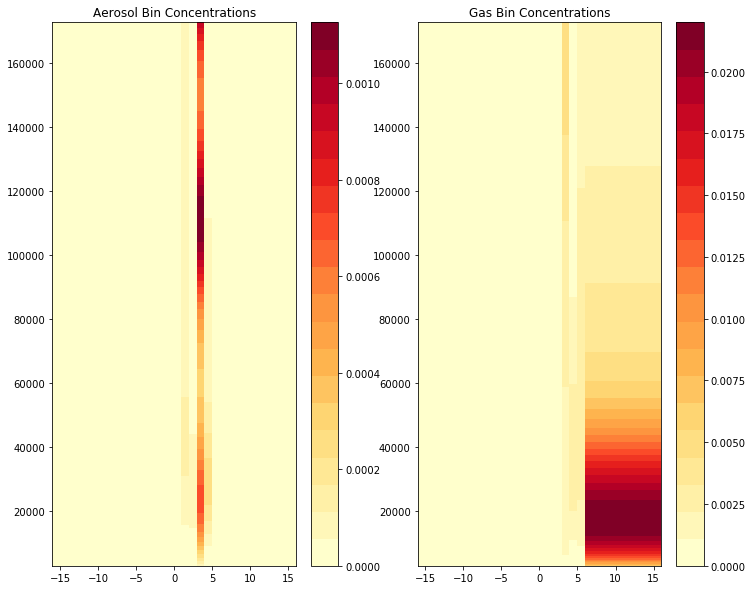

In [104]:
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.pcolormesh(bin_values, times[10:], bin_aerosol_vectors[10:], cmap=plt.get_cmap("YlOrRd", 20))
plt.title("Aerosol Bin Concentrations")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.pcolormesh(bin_values, times[10:], bin_gas_vectors[10:], cmap=plt.get_cmap("YlOrRd", 20))
plt.title("Gas Bin Concentrations")
plt.colorbar()


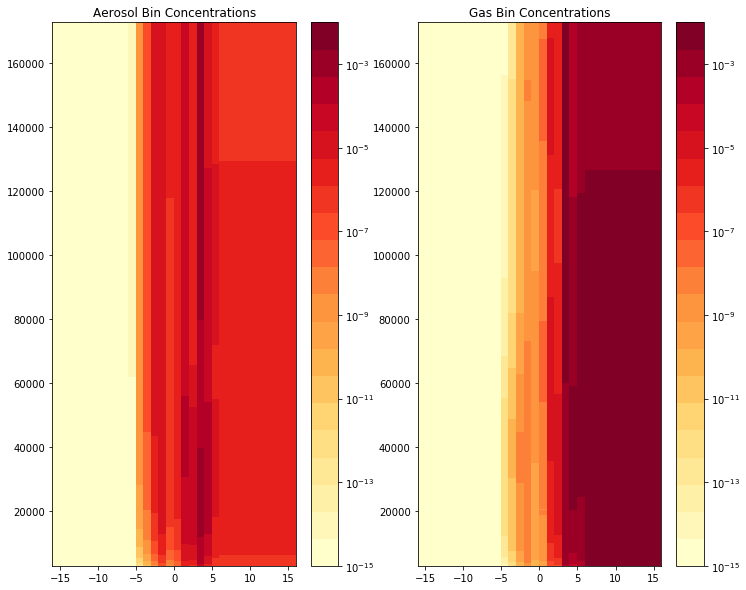

In [103]:
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.pcolormesh(bin_values, times[10:], bin_aerosol_vectors[10:], cmap=plt.get_cmap("YlOrRd", 20), norm=LogNorm(1e-15, 0.01))
plt.title("Aerosol Bin Concentrations")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.pcolormesh(bin_values, times[10:], bin_gas_vectors[10:], cmap=plt.get_cmap("YlOrRd", 20), norm=LogNorm(1e-15, 0.01))
plt.title("Gas Bin Concentrations")
plt.colorbar()


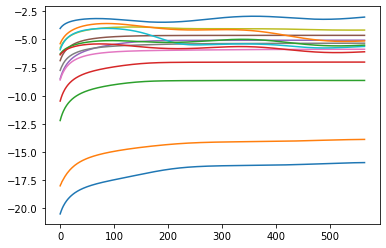

In [105]:
plt.plot(np.log10(bin_aerosol_vectors[10:, :]))

In [82]:
bin_aerosol_vectors.shape

(576, 14)

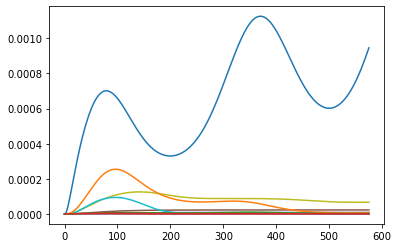

In [98]:
plt.plot(bin_aerosol_vectors)